In [1]:
import os
import sys
import glob

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Visualize Data number

In [2]:
label_file_path = os.path.join("dataset", "Torso", "Label.txt")
label = np.loadtxt(label_file_path)
print("label.shape", label.shape)

activity_range = list(range(1, 8+1))

label_idx = np.array([not any(x - x[0]) for x in label])
print("label_idx", label_idx)

label_filtered = label[label_idx]
print("label_filtered.shape", label_filtered.shape)

print("label_filtered[:,0].shape", label_filtered[:,0].shape)

label.shape (196072, 500)
label_idx [ True  True  True ...  True  True  True]
label_filtered.shape (195491, 500)
label_filtered[:,0].shape (195491,)


Text(0.5, 1.0, 'Data number bin plot')

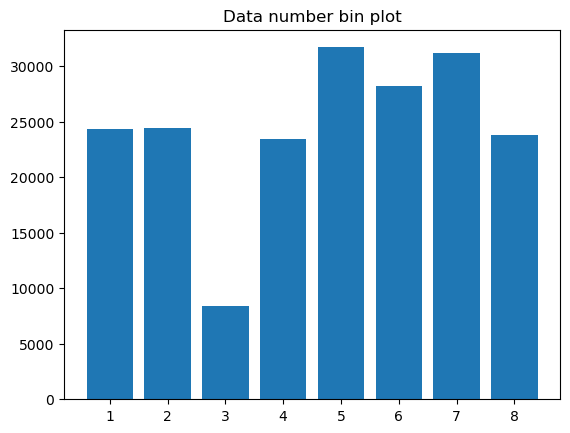

In [3]:
bins = np.histogram(label_filtered[:,0], bins=np.arange(0.5, 9, 1))
plt.bar(np.arange(1, 9, 1), bins[0])
plt.title("Data number bin plot")

Visualize all Activity with One channel (Acc x) 

In [4]:
data_file_path = os.path.join("dataset", "Torso", "Acc_x.txt")
label_file_path = os.path.join("dataset", "Torso", "Label.txt")

In [5]:
data = np.loadtxt(data_file_path)
print("data.shape", data.shape)

data.shape (196072, 500)


In [6]:
label = np.loadtxt(label_file_path)
print("label.shape", label.shape)

label.shape (196072, 500)


In [7]:
activity_range = list(range(1, 8+1))

label_idx = np.array([not any(x - x[0]) for x in label])
print("label_idx", label_idx)

label_idx [ True  True  True ...  True  True  True]


In [8]:
# Filter data that have multiple class in its time series
data_filtered = data[label_idx]
label_filtered = label[label_idx]

In [9]:
print("data_filtered.shape", data_filtered.shape)
print("label_filtered.shape", label_filtered.shape)

data_filtered.shape (195491, 500)
label_filtered.shape (195491, 500)


In [10]:
activity_sample_dict = dict()
for activity_label in activity_range:
    activity_sample_dict[activity_label] = (data_filtered[(label_filtered == activity_label)[:,0]])[1]

activity_sample_dict.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8])

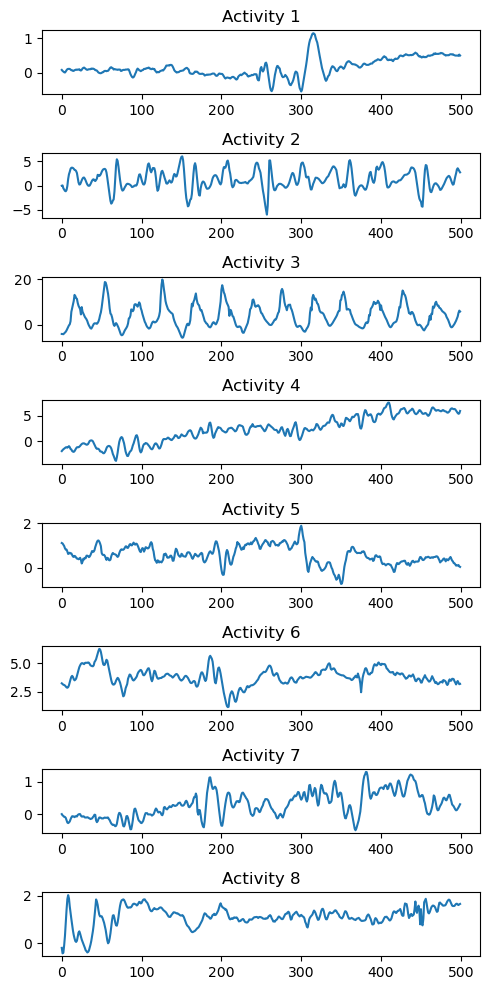

In [11]:
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(5, 10), squeeze=False, tight_layout=True)

for i in range(8):
    for j in range(1):
        axes[i, j].plot(activity_sample_dict[i + 1])
        axes[i, j].set_title(f"Activity {i + 1}")

Visualize all Activity with 3 channel (Acc x, Acc y, Acc z) 

In [26]:
acc_x_file_path = os.path.join("dataset", "Torso", "LAcc_x.txt")
acc_y_file_path = os.path.join("dataset", "Torso", "LAcc_y.txt")
acc_z_file_path = os.path.join("dataset", "Torso", "LAcc_z.txt")

label_file_path = os.path.join("dataset", "Torso", "Label.txt")

In [27]:
acc_x = np.loadtxt(acc_x_file_path)
print("data.shape", acc_x.shape)
acc_y = np.loadtxt(acc_y_file_path)
print("data.shape", acc_y.shape)
acc_z = np.loadtxt(acc_z_file_path)
print("data.shape", acc_z.shape)

label = np.loadtxt(label_file_path)
print("label.shape", label.shape)

data.shape (196072, 500)
data.shape (196072, 500)
data.shape (196072, 500)
label.shape (196072, 500)


In [28]:
activity_range = list(range(1, 8+1))

label_idx = np.array([not any(x - x[0]) for x in label])
print("label_idx", label_idx)

label_idx [ True  True  True ...  True  True  True]


In [29]:
# Filter data that have multiple class in its time series
acc_x_filtered = acc_x[label_idx]
acc_y_filtered = acc_y[label_idx]
acc_z_filtered = acc_z[label_idx]

label_filtered = label[label_idx]

In [30]:
activity_sample_dict = dict()
idx = 2

for activity_label in activity_range:
    activity_sample_dict[activity_label] = \
        ((acc_x_filtered[(label_filtered == activity_label)[:,0]])[idx],
         (acc_y_filtered[(label_filtered == activity_label)[:,0]])[idx],
         (acc_z_filtered[(label_filtered == activity_label)[:,0]])[idx],)

activity_sample_dict.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8])

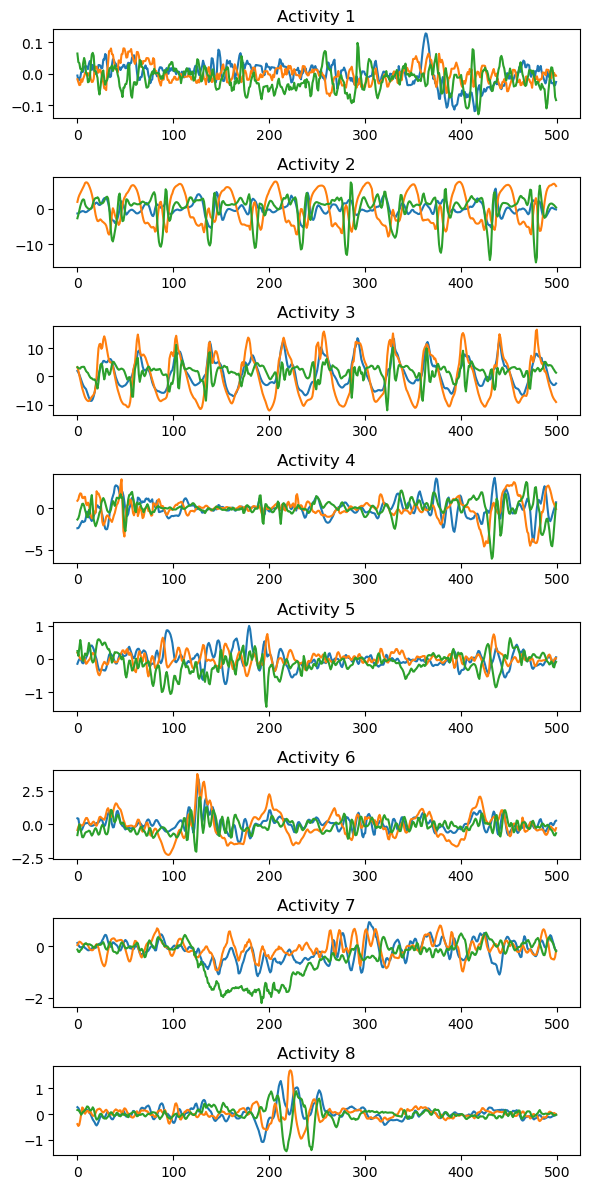

In [40]:
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(6, 12), squeeze=False, tight_layout=True)

for i in range(8):
    for j in range(1):
        axes[i, j].plot(activity_sample_dict[i + 1][0], label="LAcc_x")
        axes[i, j].plot(activity_sample_dict[i + 1][1], label="LAcc_y")
        axes[i, j].plot(activity_sample_dict[i + 1][2], label="LAcc_z")
        axes[i, j].set_title(f"Activity {i + 1}")

In [34]:
from utils.FFT import stft

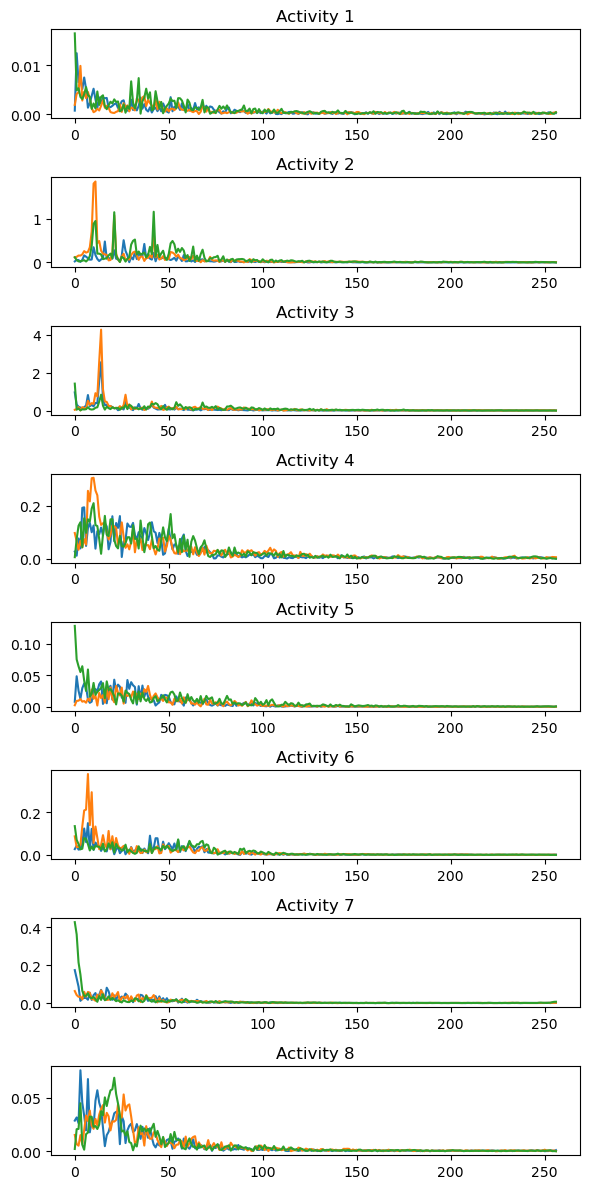

In [39]:
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(6, 12), squeeze=False, tight_layout=True)

for i in range(8):
    for j in range(1):
        axes[i, j].plot(stft(activity_sample_dict[i + 1][0])[1], label="LAcc_x_fft")
        axes[i, j].plot(stft(activity_sample_dict[i + 1][1])[1], label="LAcc_y_fft")
        axes[i, j].plot(stft(activity_sample_dict[i + 1][2])[1], label="LAcc_z_fft")
        axes[i, j].set_title(f"Activity {i + 1}")